In [2]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import networkx.algorithms.community as nxcom

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1.2 #set the value globally

import time

# Community detection

In [3]:
header = 'karate'
# header = 'dolphins'
# header = 'facebook'

G = nx.read_gml('data/graph_'+header+'.gml', label='id')
G.number_of_nodes()

34

In [4]:
# start = time.time()
# compGN = nxcom.girvan_newman(G)
# # communitiesGN = next(comp)
# communitiesGN = [c for c in sorted(compGN, key=len, reverse=True)]
# print(f"The network has {len(communitiesGN)} communities with Girvan-Newman.")
# end = time.time()
# print(end - start)

In [5]:
start = time.time()
communitiesCNM = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)
print(f"The network has {len(communitiesCNM)} communities with Clauset-Newman-Moore.")
end = time.time()
print(end - start)

The network has 3 communities with Clauset-Newman-Moore.
0.009771585464477539


In [6]:
len(communitiesCNM[0])

17

In [7]:
start = time.time()
compLP = nxcom.label_propagation_communities(G)
# communitiesLP = next(comp)
communitiesLP = [c for c in sorted(compLP, key=len, reverse=True)]
print(f"The network has {len(communitiesLP)} communities with Label Propagation.")
end = time.time()
print(end - start)

The network has 3 communities with Label Propagation.
0.0032775402069091797


In [8]:
len(communitiesLP[0])

16

In [9]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)            

In [10]:
communities = communitiesCNM
communities = communitiesLP

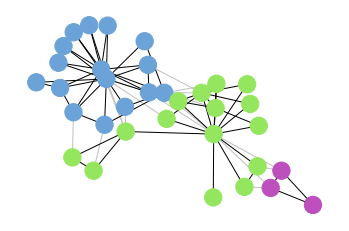

In [11]:
# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)

node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

# Set community color for edges between members of the same community (internal) and intra-community edges (external)
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

# plt.style.use('black_background')
# plt.style.use('classic')
plt.style.use('seaborn-whitegrid')


pos = nx.spring_layout(G)

# plt.rcParams.update({'figure.figsize': (15, 10)})
# Draw external edges
fig, ax = plt.subplots()
nx.draw_networkx(
    G,
    pos=pos,
    node_size=0,
    edgelist=external,
    edge_color="silver",
    node_color=node_color,
#     alpha=0.2, 
    with_labels=False)
nx.draw_networkx(
    G,
    pos=pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color,
#     alpha=0.05, 
    with_labels=False)
plt.axis("off")
plt.show()
# plt.close('all')


In [16]:
GR = nx.random_reference(G, niter=100, connectivity=False)

In [17]:
start = time.time()
communitiesR = sorted(nxcom.greedy_modularity_communities(GR), key=len, reverse=True)
print(f"The randomized network has {len(communitiesR)} communities with Clauset-Newman-Moore.")
end = time.time()
print(end - start)

The randomized network has 5 communities with Clauset-Newman-Moore.
0.004752635955810547


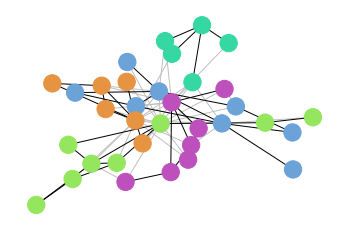

In [18]:
# Set node and edge communities
set_node_community(GR, communitiesR)
set_edge_community(GR)

node_color = [get_color(GR.nodes[v]['community']) for v in GR.nodes]

# Set community color for edges between members of the same community (internal) and intra-community edges (external)
external = [(v, w) for v, w in GR.edges if GR.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in GR.edges if GR.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

# plt.style.use('black_background')
# plt.style.use('classic')
plt.style.use('seaborn-whitegrid')


pos = nx.spring_layout(GR)

# plt.rcParams.update({'figure.figsize': (15, 10)})
# Draw external edges
fig, ax = plt.subplots()
nx.draw_networkx(
    GR,
    pos=pos,
    node_size=0,
    edgelist=external,
    edge_color="silver",
    node_color=node_color,
#     alpha=0.2, 
    with_labels=False)
nx.draw_networkx(
    GR,
    pos=pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color,
#     alpha=0.05, 
    with_labels=False)
plt.axis("off")
plt.show()
# plt.close('all')


## ER model

In [20]:
N=500

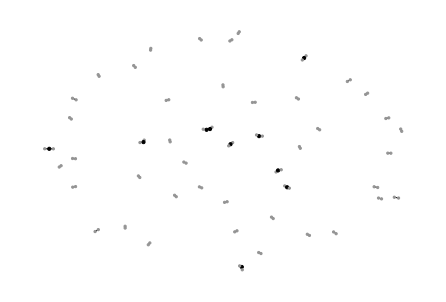

In [21]:
G = nx.erdos_renyi_graph(N,p=0.2/N)
d = dict(G.degree)
nx.draw(G, pos=nx.spring_layout(G), node_color=[v for v in d.values()], nodelist=d.keys(), node_size=[v * 5 for v in d.values()])

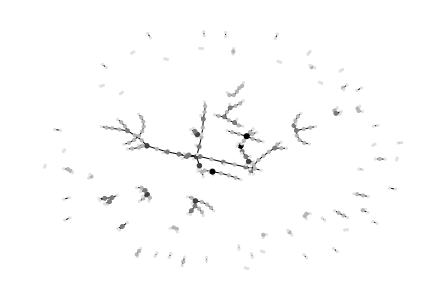

In [22]:
G = nx.erdos_renyi_graph(N,p=1./N)
d = dict(G.degree)
nx.draw(G, pos=nx.spring_layout(G), node_color=[v for v in d.values()], nodelist=d.keys(), node_size=[v * 5 for v in d.values()])

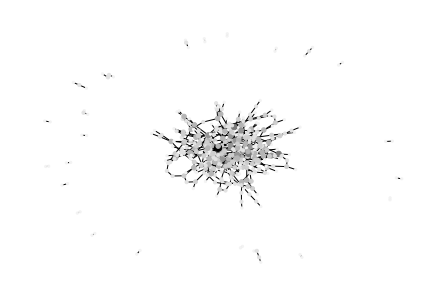

In [23]:
G = nx.erdos_renyi_graph(N,p=2./N)
d = dict(G.degree)
nx.draw(G, pos=nx.spring_layout(G), node_color=[v for v in d.values()], nodelist=d.keys(), node_size=[v * 5 for v in d.values()])

In [24]:
N=100

In [25]:
prange = np.arange(0.1,1.1,0.1)
clustp = []
for p in prange:
    g = nx.erdos_renyi_graph(N,p)
    clus = nx.average_clustering(g)
    clustp.append(clus)
# filename = 'data/erdos_varp_clustp.npy'
#np.save(filename, clustp)
# clustp = np.load(filename, clustp)

In [26]:
repliche = 100
prange0 = np.arange(0.001,0.05,0.001)
prange0 = 10**(np.arange(-np.log10(N)-1.0,-np.log10(N)+1.0-0.01,0.1))
sizetp = []

In [27]:
count=0
for p in prange0:
    count += 1 
#     print("to go", len(prange0)-count)
    sizerep=0
    for rr in range(repliche):
        g = nx.erdos_renyi_graph(N,p)
        components = sorted(nx.connected_components(g), key=len, reverse=True)
        lcc = g.subgraph(components[0])
        #g = nx.convert_node_labels_to_integers(lcc)
        sizerep += float(lcc.number_of_nodes())/N
    sizetp.append(sizerep/repliche)
sizetp = np.asarray(sizetp)

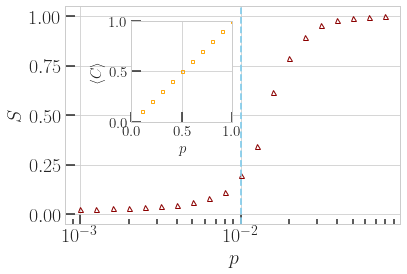

In [28]:
coltri = ["darkred", "skyblue", "orange"]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot((prange0)[::1],sizetp[::1], '^',  ms=5,color=coltri[0], label=r'$\langle S \rangle$',mfc='none')
plt.axvline(x=1./N,linestyle='--', lw='1.8',color=coltri[1])
#plt.legend(loc='best',prop={'size':20},frameon=True)
ax.set_xlabel(r"$p$", fontsize=20)
ax.set_ylabel(r"$S$", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
# ax.set_yticks([0.,1.],(0.0,1.0))
# ax.set_xlim(5*10**(-6.0),5*10**(-2.0))
ax.set_ylim(0-0.05,1.0+0.05)
ax.set_xscale('log')
#plt.yscale('log')
left, bottom, width, height = [0.22,0.48,0.35,0.35]
axinset = fig.add_axes([left, bottom, width, height])
axinset.plot(prange,clustp, 's', ms=3, c=coltri[2], alpha=0.95, label=r'$v(t)$',mfc='none')
axinset.tick_params(axis='both', width=1.5, length = 10, labelsize=15,direction='in')
axinset.set_xticks([0.,.5,1.])
axinset.set_yticks([0.,.5,1.])
axinset.set_xlim(0.,1.)
axinset.set_ylim(0.,1.)
axinset.set_aspect('equal')
axinset.set_xlabel(r"$p$", fontsize=15)
axinset.set_ylabel(r"$\langle C \rangle$", fontsize=15)
# fig.savefig("fig_erdosphasetransition.pdf", bbox_inches='tight')
# plt.close("all")
plt.show()

The average clustering is actually exactly equal to p. Indeed it represents the probability that two neighbours of a node are themselves connected, but in ER random graphs the probability of a link existing is just p, as they are all independent.
   

In [29]:
prange0

array([0.001     , 0.00125893, 0.00158489, 0.00199526, 0.00251189,
       0.00316228, 0.00398107, 0.00501187, 0.00630957, 0.00794328,
       0.01      , 0.01258925, 0.01584893, 0.01995262, 0.02511886,
       0.03162278, 0.03981072, 0.05011872, 0.06309573, 0.07943282])

# WS model

In [30]:
prange = 10**(np.arange(-3.0,0.01,0.1))#[::4]
m=5

In [31]:
repliche = 100
    #sizerep=0
    #for rr in range(repliche):

# diameter = []
# meandegree = []
avsplt = []
clustp = []

In [32]:
N=100
   

In [33]:
 
for p in prange:
    
    print("p:", p)
    
    avspltrep=0
    clustprep=0
    
    for rr in range(repliche):
        
        g = nx.watts_strogatz_graph(N,2*m,p)
        
        avspltrep += float(nx.average_shortest_path_length(g))
        clustprep += float(nx.average_clustering(g))
    
    clustp.append(clustprep/repliche)
    avsplt.append(avspltrep/repliche)
    

p: 0.001
p: 0.0012589254117941675
p: 0.001584893192461114
p: 0.0019952623149688807
p: 0.002511886431509582
p: 0.0031622776601683824
p: 0.003981071705534978
p: 0.00501187233627273
p: 0.006309573444801942
p: 0.00794328234724283
p: 0.010000000000000021
p: 0.012589254117941701
p: 0.015848931924611172
p: 0.01995262314968885
p: 0.025118864315095874
p: 0.03162277660168389
p: 0.03981071705534985
p: 0.0501187233627274
p: 0.06309573444801955
p: 0.07943282347242846
p: 0.10000000000000041
p: 0.12589254117941726
p: 0.15848931924611206
p: 0.1995262314968889
p: 0.25118864315095923
p: 0.31622776601683955
p: 0.39810717055349937
p: 0.501187233627275
p: 0.6309573444801969
p: 0.7943282347242863
p: 1.0000000000000062


In [34]:
avsplt = np.asarray(avsplt)
clustp = np.asarray(clustp)

In [35]:
def func(p,m):
    return 3./2*(m-1)/(2*m-1) * (1-p)**3 
#x0 = np.array([1, 1./3, 0.1])
#popt, pcov = curve_fit(func, Nrange, meandegree, x0, maxfev=80000)
#slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(Nrange),np.log(meandegree))

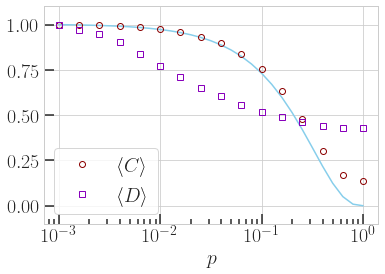

In [36]:
popt = np.array([m])


every=1

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(prange, func(prange, *popt)/clustp[0], '-',color=coltri[1], lw=1.5)#, label=r'$3/2(m-1)/(2m-1)(1-p)^3$')
plt.plot(prange[::every][::2],np.array(clustp)[::every][::2]/clustp[0], 'o', ms = 6, color=coltri[0], label=r'$\langle C \rangle$',mfc='none')
plt.plot(prange[::every][::2],np.array(avsplt)[::every][::2]/avsplt[0], 's', ms=6, color='#8800bb', label=r'$\langle D \rangle$',mfc='none')
#plt.plot(Nrange,Nrange*(1./diameter), '--', lw=3, color=coltri[1],  label=r'simulation')
plt.legend(loc='best',prop={'size':20},frameon=True)
#plt.xlabel(r"$\ln(N)$", fontsize=20)
#plt.ylabel(r"$\ln\langle k \rangle$", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
#ax.set_xlim(8,5000)
ax.set_ylim(-0.1,1.1)
plt.xscale('log')
#plt.yscale('log')
##plt.show()
#inset=plt.axes([0.27,0.51,0.35,0.35])
#plt.plot(prange,clustp, 's',ms=2, c='b', alpha=0.65, label=r'$v(t)$')
#plt.plot(xdata,x0[0]*np.ones(len(xdata)), '-', c='m',lw=2.2, label=r'$v_{\bar{c}}$')
#plt.legend(loc='best',prop={'size':15},frameon=True)
#plt.tick_params(axis='both', width=1.5, length = 10, labelsize=15,direction='in')
#plt.setp(inset,xticks=[0.5,1.5,2.5])
#plt.setp(inset,yticks=[-2.,-1., 0.])
#plt.setp(inset,xlim=[0.,2.5])
#plt.setp(inset,ylim=[-2.0,0.]
plt.xlabel(r"$p$", fontsize=20)
#plt.ylabel(r"$\langle C \rangle$", fontsize=15)
# fig.savefig("fig_wattsclus.pdf", bbox_inches='tight')
# plt.close("all")
plt.show()